# 고객별 광고 반응율 예측
## Logistic Regression

고객의 수입, 연령, 성별 등 데이터를 활용하여  
광고에 대한 고객의 반응 여부를 예측한다.

## 모듈 및 데이터 로드

In [1]:
# 모듈 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드

data = pd.read_csv('advertising.csv')

## 데이터 특성 확인

In [3]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [5]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0
999,45.01,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,6/3/2016 21:43,1


In [6]:
data.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
690,87.16,33.0,60805.93,197.15,Reduced holistic help-desk,Blairville,0,China,2/11/2016 11:50,0


In [7]:
data.shape

(1000, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


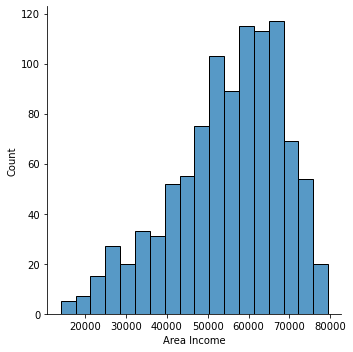

In [10]:
sns.displot(x=data['Area Income'])

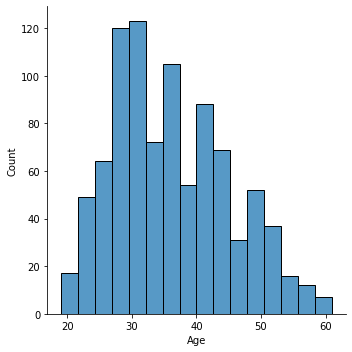

In [11]:
sns.displot(x=data['Age'])

In [12]:
data['Country'].nunique()

237

In [13]:
data['City'].nunique()

969

In [14]:
data['Ad Topic Line'].nunique()

1000

## 불필요한 컬럼 제거

In [15]:
# Text Data인 Country, City, Ad Topic Line column의 경우 고유값이 너무 많으므로
# 본 프로젝트에서는 제거하여 사용하겠다. 

data.drop(['Country', 'City', 'Ad Topic Line'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,0,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,1,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,0,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,1,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,0,6/3/2016 3:36,0
...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,1,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,1,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,0,3/24/2016 2:35,0


## Missing Value 확인 및 처리

In [16]:
data.isna().sum() / len(data)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

Age column의 데이터 중 8.4%가 결측치임을 확인하였다.

In [17]:
data['Age'].mean()

36.12882096069869

In [18]:
data['Age'].median()

35.0

In [19]:
# 프로젝트 진행을 위해 Age column의 결측치를 나이의 평균으로 대치(impute)한다.

data = data.fillna(round(data['Age'].mean()))

In [20]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [21]:
# 모든 결측치를 대치했음을 확인

data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Train/Test Set 분리

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data[['Daily Time Spent on Site','Age','Area Income', 'Daily Internet Usage','Male']]
y = data['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Logistic Regression 모델 만들기

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression().fit(X_train, y_train)

In [27]:
# Coefficient 확인

model.coef_

array([[-6.64737762e-02,  2.66015818e-01, -1.15501902e-05,
        -2.44285539e-02,  2.00758165e-03]])

## 예측 및 평가

In [28]:
predictions = model.predict(X_test)

In [29]:
y_test

249    1
353    0
537    0
424    1
564    1
      ..
684    1
644    0
110    1
28     1
804    1
Name: Clicked on Ad, Length: 200, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
accuracy_score(predictions, y_test)

0.9

In [32]:
# confusion matrix: array([[TP, FN], [FP, TN]])

confusion_matrix(predictions, y_test)

array([[92, 12],
       [ 8, 88]], dtype=int64)

## 참고: 분류 모델의 성능 평가

### Confusion Matrix = [[TP, FN], [FP, TN]]  
TP: Actual Positive & Predictive Positive  
FN: Actual Positive & Predictive Negative  
FP: Actual Negative & Predictive Positive  
TN: Actual Negative & Predictive Negative  

$Accuracy = \frac{TP + TN}{TP + FN + FP + TN}$  

$Precision = \frac{TP}{TP + FP}$  

$Recall = \frac{TP}{TP + FN}$  
  
$F1-Score = \frac{2 \times Precision \times Recall}{Precision + Recall}$  

Imbalanced Data에서 주로 accuracy 대신 F1 score 사용